In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

In [2]:
accre_unfiltered = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
accre_unfiltered

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [3]:
maxwell_unfiltered =  accre_unfiltered[accre_unfiltered['PARTITION'] == 'maxwell']
maxwell_unfiltered_df = pd.DataFrame(maxwell_unfiltered)
maxwell_unfiltered = accre_unfiltered[accre_unfiltered['PARTITION'] == 'maxwell']

In [4]:
maxwell_unfiltered['STATE'].value_counts().head(10)

COMPLETED              127043
CANCELLED by 353986       304
CANCELLED by 855431       300
RUNNING                   171
FAILED                    117
CANCELLED                  85
CANCELLED by 885837        37
CANCELLED by 756088        37
CANCELLED by 885613        24
CANCELLED by 196703        13
Name: STATE, dtype: int64

Maxwell has the best success rate by a wide margin. 127k completions to 117 fails.

In [5]:
pascal_unfiltered =  accre_unfiltered[accre_unfiltered['PARTITION'] == 'pascal']
pascal_unfiltered_df = pd.DataFrame(maxwell_unfiltered)
pascal_unfiltered = accre_unfiltered[accre_unfiltered['PARTITION'] == 'pascal']

In [6]:
pascal_unfiltered['STATE'].value_counts().head(10)

COMPLETED              81314
CANCELLED by 9201      41637
RUNNING                 1021
CANCELLED by 353986      564
CANCELLED                256
CANCELLED by 891307      234
FAILED                   230
CANCELLED by 887337       51
CANCELLED by 885613       40
CANCELLED by 879523       32
Name: STATE, dtype: int64

Pascal has the worst by far. 81k completions to 230 fails.

In [7]:
turing_unfiltered =  accre_unfiltered[accre_unfiltered['PARTITION'] == 'turing']
turing_unfiltered_df = pd.DataFrame(maxwell_unfiltered)
turing_unfiltered = accre_unfiltered[accre_unfiltered['PARTITION'] == 'turing']

In [8]:
turing_unfiltered['STATE'].value_counts().head(10)

COMPLETED              74976
CANCELLED by 174423     6116
CANCELLED                606
CANCELLED by 891307      274
CANCELLED by 887337      157
CANCELLED by 756088      148
FAILED                    93
CANCELLED by 885837       83
CANCELLED by 885613       48
RUNNING                   45
Name: STATE, dtype: int64

Turing is in the middle. 75k completions to 93 fails.

In [9]:
accre = pd.DataFrame(accre_unfiltered)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [10]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
accre

C:\Users\garre\AppData\Local\Temp\ipykernel_16468\1215905320.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [11]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit = 'S')
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit = 'S')
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED


In [12]:
accre_completed = accre[accre['STATE'] == 'COMPLETED']

In [13]:
accre_failed = accre[accre['STATE'] == 'FAILED']

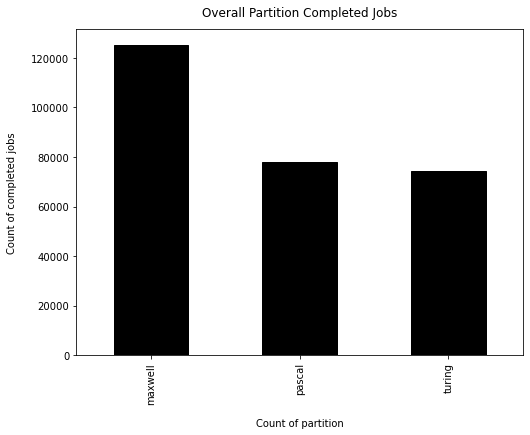

In [14]:
accre_completed['PARTITION'].value_counts().plot(kind = 'bar', figsize=(8, 6), edgecolor='black', color=['Black'])
plt.xlabel("Count of partition", labelpad=14)
plt.ylabel("Count of completed jobs", labelpad=14)
plt.title("Overall Partition Completed Jobs", y=1.02);

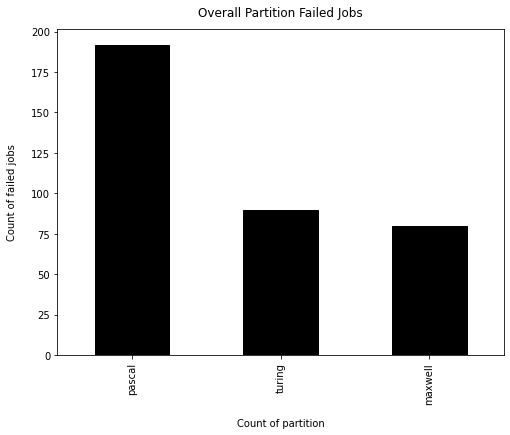

In [15]:
accre_failed['PARTITION'].value_counts().plot(kind = 'bar', figsize=(8, 6), edgecolor='black', color=['Black'])
plt.xlabel("Count of partition", labelpad=14)
plt.ylabel("Count of failed jobs", labelpad=14)
plt.title("Overall Partition Failed Jobs", y=1.02);

In [16]:
accre_user_failed = accre_failed['USER'].value_counts()

In [17]:
accre_user_completed = accre_completed['USER'].value_counts()

In [18]:
accre_user_pct = (accre_user_failed / accre_user_completed * 100).fillna(0)
accre_user_pct

abigail       0.000000
adalyn        0.000000
adolfo        0.000000
alba          0.000000
aleah         0.000000
                ...   
venus         0.000000
whitley       0.000000
wilhelmina    0.000000
wyman         7.142857
yuliana       0.000000
Name: USER, Length: 173, dtype: float64

In [19]:
accre_user_pct_df = pd.DataFrame(accre_user_pct)
accre_user_pct_df.rename(columns = {'USER': 'Percent Failed'}, inplace = True)
accre_user_pct_df.index.name = 'Users'
accre_user_pct_df = accre_user_pct_df[~np.all(accre_user_pct_df == 0, axis=1)]
accre_user_pct_df = accre_user_pct_df.sort_values(by = ['Percent Failed'], ascending = True)
accre_user_pct_df = accre_user_pct_df.tail(14)
accre_user_pct_df

,Percent Failed
Users,
diandra,5.882353
demarcus,6.268012
penny,7.142857
wyman,7.142857
hazel,10.344828
benedict,11.267606
mel,11.830986
lea,13.807531
tommie,14.906832


<AxesSubplot:title={'center':'Failed Percentages for Users with 50+ Jobs'}, ylabel='Users'>

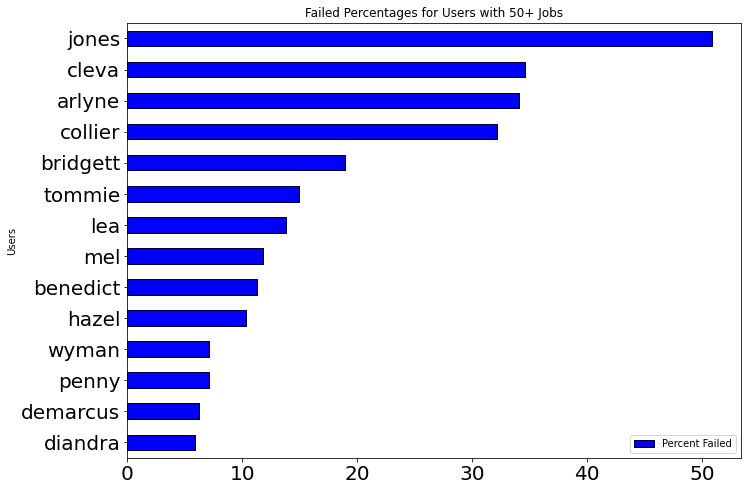

In [20]:
accre_user_pct_df.plot(
    kind = 'barh', color = 'blue', edgecolor = 'black', figsize=(11,8), title = 'Failed Percentages for Users with 50+ Jobs', xlabel = 'Users', fontsize= 20)

In [21]:
total_usedtime_partition = accre.groupby(['USEDTIME', 'PARTITION']).sum()
total_usedtime_partition = total_usedtime_partition.reset_index()
total_usedtime_partition

,USEDTIME,PARTITION,NODES,CPUS,GPUS
0,0 days 00:00:00,maxwell,13,39,77
1,0 days 00:00:00,pascal,17,22,22
2,0 days 00:00:00,turing,5,40,20
3,0 days 00:00:01,maxwell,30,147,158
4,0 days 00:00:01,pascal,16,32,37
...,...,...,...,...,...
29405,5 days 00:02:24,turing,1,3,1
29406,5 days 00:04:25,turing,1,6,1
29407,5 days 00:04:26,turing,1,6,1
29408,8 days 03:15:34,pascal,3,21,16


In [22]:
accre_account = accre['ACCOUNT'].value_counts()
accre_account

glasshouse       234998
virginia           9488
malanga            8157
prince             7174
grisette           5242
harovin            4534
antares            3015
sunburst           1505
pasilla            1263
plumcot             790
pecans              576
kinnow              406
bertanne            198
almonds             197
apple               186
cactus              113
clara                82
orange               74
rosemarie            55
horseradish          41
sugranineteen        31
white                30
gem                  19
pinole               18
packham               6
bunch                 1
summer                1
Name: ACCOUNT, dtype: int64

In [23]:
accre_failed = accre[accre['STATE'] == 'FAILED']['ACCOUNT'].value_counts()
accre_failed

glasshouse    250
sunburst       87
apple          11
almonds         6
harovin         4
clara           1
grisette        1
pasilla         1
bertanne        1
Name: ACCOUNT, dtype: int64

In [24]:
accre_failed_pct = (accre_failed / accre_account * 100).fillna(0)
accre_failed_pct

almonds          3.045685
antares          0.000000
apple            5.913978
bertanne         0.505051
bunch            0.000000
cactus           0.000000
clara            1.219512
gem              0.000000
glasshouse       0.106384
grisette         0.019077
harovin          0.088222
horseradish      0.000000
kinnow           0.000000
malanga          0.000000
orange           0.000000
packham          0.000000
pasilla          0.079177
pecans           0.000000
pinole           0.000000
plumcot          0.000000
prince           0.000000
rosemarie        0.000000
sugranineteen    0.000000
summer           0.000000
sunburst         5.780731
virginia         0.000000
white            0.000000
Name: ACCOUNT, dtype: float64

In [25]:
accre_failed_pct_df = pd.DataFrame(accre_failed_pct)
accre_failed_pct_df.rename(columns = {'ACCOUNT': 'Percent Failed'}, inplace = True)
accre_failed_pct_df.index.name = 'ACCOUNTS'
accre_failed_pct_df = accre_failed_pct_df[~np.all(accre_failed_pct_df == 0, axis=1)]
accre_failed_pct_df = accre_failed_pct_df.sort_values(by = ['Percent Failed'], ascending = True)
accre_failed_pct_df

,Percent Failed
ACCOUNTS,
grisette,0.019077
pasilla,0.079177
harovin,0.088222
glasshouse,0.106384
bertanne,0.505051
clara,1.219512
almonds,3.045685
sunburst,5.780731
apple,5.913978


<AxesSubplot:title={'center':'Failed Percentages for Accounts with 100+ Jobs'}, ylabel='Accounts'>

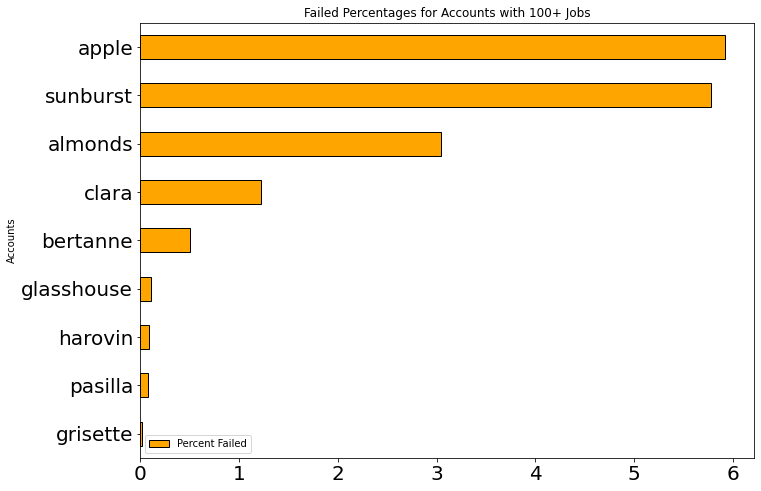

In [26]:
accre_failed_pct_df.plot(
    kind = 'barh', color = 'orange', edgecolor = 'black', figsize=(11,8), title = 'Failed Percentages for Accounts with 100+ Jobs', xlabel = 'Accounts', fontsize= 20)

In [27]:
maxwell =  accre[accre['PARTITION'] == 'maxwell']
maxwell_df = pd.DataFrame(maxwell)

In [28]:
maxwell = accre[accre['PARTITION'] == 'maxwell']
maxwell

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
244,32883667,glasshouse,miya,374.38,0 days 04:00:00,0 days 00:16:06,1,1,1,maxwell,127:0,FAILED
462,32885245,glasshouse,brady,404.90,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
467,32885270,glasshouse,brady,403.18,0 days 05:00:00,0 days 00:08:48,1,3,1,maxwell,0:0,COMPLETED
508,32885377,glasshouse,brodie,188.82,0 days 12:00:00,0 days 00:02:45,1,1,1,maxwell,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
335127,46542252,glasshouse,miya,6.57,2 days 00:00:00,0 days 00:00:34,1,6,4,maxwell,0:0,COMPLETED
335856,46577601,glasshouse,tamara,1.98,3 days 08:00:00,0 days 00:00:08,2,12,6,maxwell,0:0,COMPLETED
335916,46582283,glasshouse,jonnie,2068.21,2 days 00:00:00,2 days 00:00:38,1,6,4,maxwell,0:9,CANCELLED
335984,46586533,glasshouse,tamara,1.79,3 days 08:00:00,0 days 00:00:05,2,12,6,maxwell,0:0,COMPLETED


In [29]:
maxwell['USEDMEM'].value_counts()

5.53       24156
5.54        9188
7.42        2426
7.41         359
7.53         133
           ...  
1135.12        1
1070.57        1
1180.81        1
1118.98        1
1.77           1
Name: USEDMEM, Length: 36985, dtype: int64

In [30]:
maxwell['STATE'].value_counts()

COMPLETED              125371
FAILED                     80
CANCELLED                  44
CANCELLED by 885613         4
CANCELLED by 196703         1
CANCELLED by 859439         1
Name: STATE, dtype: int64

In [31]:
maxwell.describe()

,REQTIME,USEDTIME,NODES,CPUS,GPUS
count,125501,125501,125501.000000,125501.000000,125501.000000
mean,0 days 15:05:32.416474769,0 days 00:31:02.469693468,1.002908,1.135704,1.047275
std,0 days 22:31:29.954851512,0 days 05:30:12.537301152,0.085430,1.250943,0.592964
min,0 days 00:01:00,0 days 00:00:00,1.000000,1.000000,1.000000
25%,0 days 10:00:00,0 days 00:00:10,1.000000,1.000000,1.000000
50%,0 days 10:00:00,0 days 00:03:03,1.000000,1.000000,1.000000
75%,0 days 10:00:00,0 days 00:03:45,1.000000,1.000000,1.000000
max,15 days 00:00:00,5 days 00:00:37,10.000000,80.000000,40.000000


In [32]:
pascal = accre[accre['PARTITION'] == 'pascal']
pascal_df = pd.DataFrame(pascal)

In [33]:
pascal = accre[accre['PARTITION'] == 'pascal']
pascal

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED
7,32880741,malanga,arline,1119.66,2 days 00:00:00,0 days 08:09:18,1,2,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336914,46753151,malanga,arline,29.85,2 days 00:00:00,0 days 00:14:28,1,2,1,pascal,0:0,COMPLETED
336915,46753169,malanga,arline,28.11,2 days 00:00:00,0 days 00:14:16,1,2,1,pascal,0:0,COMPLETED
336916,46753170,glasshouse,tamara,10007.76,0 days 20:00:00,0 days 00:29:16,1,5,4,pascal,0:0,COMPLETED
336917,46753171,malanga,arline,28.21,2 days 00:00:00,0 days 00:14:29,1,2,1,pascal,0:0,COMPLETED


In [34]:
pascal['USEDMEM'].value_counts()

5.53        2363
5.54        1469
7.41        1151
7.42         182
8.05         159
            ... 
9023.48        1
4.58           1
17166.96       1
12166.56       1
4.84           1
Name: USEDMEM, Length: 49225, dtype: int64

In [35]:
pascal['STATE'].value_counts()

COMPLETED              77770
FAILED                   192
CANCELLED                 58
CANCELLED by 649321       17
CANCELLED by 785491        5
CANCELLED by 159541        1
CANCELLED by 0             1
CANCELLED by 46207         1
CANCELLED by 885613        1
Name: STATE, dtype: int64

In [36]:
pascal.describe()

,REQTIME,USEDTIME,NODES,CPUS,GPUS
count,78046,78046,78046.000000,78046.000000,78046.000000
mean,2 days 00:13:59.328857340,0 days 02:59:48.791712579,1.011134,1.475732,1.163557
std,1 days 20:50:18.034890641,0 days 12:46:30.094836860,0.183548,1.558781,1.229651
min,0 days 00:01:00,0 days 00:00:00,1.000000,1.000000,1.000000
25%,0 days 10:00:00,0 days 00:02:46,1.000000,1.000000,1.000000
50%,1 days 00:00:00,0 days 00:09:04,1.000000,1.000000,1.000000
75%,3 days 00:00:00,0 days 00:36:10.750000,1.000000,2.000000,1.000000
max,12 days 00:00:00,8 days 03:15:34,15.000000,120.000000,60.000000


In [37]:
turing = accre[accre['PARTITION'] == 'turing']
turing_df = pd.DataFrame(turing)   

In [38]:
turing = accre[accre['PARTITION'] == 'turing']
turing

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
80,32881540,virginia,garrett,4039.36,0 days 02:00:00,0 days 02:00:05,1,6,1,turing,0:0,COMPLETED
91,32882556,virginia,garrett,55.39,0 days 06:00:00,0 days 06:00:05,1,6,1,turing,0:0,COMPLETED
92,32882567,virginia,garrett,281.12,0 days 06:00:00,0 days 06:00:05,1,6,1,turing,0:0,COMPLETED
93,32882568,virginia,garrett,57.32,0 days 06:00:00,0 days 06:00:17,1,6,1,turing,0:0,COMPLETED
172,32883336,virginia,erla,129.24,0 days 01:00:00,0 days 00:54:52,1,6,1,turing,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED


In [39]:
turing['USEDMEM'].value_counts()

7.41       15491
5.54        2589
5.53        1319
5.41         988
7.42         865
           ...  
2239.59        1
2249.13        1
2220.82        1
2248.92        1
145.24         1
Name: USEDMEM, Length: 42116, dtype: int64

In [40]:
turing['STATE'].value_counts()

COMPLETED              74348
CANCELLED                194
FAILED                    90
CANCELLED by 505355       11
CANCELLED by 161909        4
OUT_OF_MEMORY              3
CANCELLED by 756088        1
CANCELLED by 785491        1
CANCELLED by 46207         1
Name: STATE, dtype: int64

In [41]:
turing['USEDMEM'].describe()

count     74653
unique    42116
top        7.41
freq      15491
Name: USEDMEM, dtype: object

In [42]:
turing.describe()

,REQTIME,USEDTIME,NODES,CPUS,GPUS
count,74653,74653,74653.000000,74653.000000,74653.000000
mean,0 days 13:35:37.233868699,0 days 02:12:53.331426734,1.003684,2.934899,1.076313
std,1 days 06:09:31.203496814,0 days 12:14:03.472997297,0.109310,2.150887,0.716668
min,0 days 00:01:00,0 days 00:00:00,1.000000,1.000000,1.000000
25%,0 days 00:30:00,0 days 00:00:14,1.000000,2.000000,1.000000
50%,0 days 01:00:00,0 days 00:03:03,1.000000,2.000000,1.000000
75%,0 days 12:00:00,0 days 00:15:45,1.000000,4.000000,1.000000
max,11 days 00:00:00,9 days 23:59:54,10.000000,80.000000,40.000000


In [43]:
maxwell['USEDMEM'].describe()

count     125501
unique     36985
top         5.53
freq       24156
Name: USEDMEM, dtype: object

In [44]:
pascal['USEDMEM'].describe()

count     78046
unique    49225
top        5.53
freq       2363
Name: USEDMEM, dtype: object

In [45]:
turing['USEDMEM'].describe()

count     74653
unique    42116
top        7.41
freq      15491
Name: USEDMEM, dtype: object

Linear Regression on the seperate partitions

In [ ]:
lm = smf.ols('USEDMEM ~ GPUS', data = turing).fit()
lm.summary()

In [ ]:
accre_regex = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
accre_regex

33,344 out of 125,502 entries are 5.53-5.54M memory used. Roughly 26%

In [ ]:
runtime_usage_per_gpu = turing[turing['USEDTIME' * 'GPUS']]

In [ ]:
Fig, ax = plt.subplots(figsize = (8, 6))
plt.bar(x = accre['PARTITION'], height = accre['USEDMEM'])
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

In [ ]:
Fig, ax = plt.subplots(figsize=(15, 12))
accre[accre['PARTITION'] == 'maxwell'].plot(x='USEDTIME', y='USEDMEM', ax = ax)
accre[accre['PARTITION'] == 'pascal'].plot(x='USEDTIME', y='USEDMEM', ax = ax)
accre[accre['PARTITION'] == 'turing'].plot(x='USEDTIME', y='USEDMEM', ax = ax)
ax.legend(labels=['Maxwell', 'Pascal', 'Turing'])
plt.show()